<a href="https://colab.research.google.com/github/DataSayant1st/MachineLearning_and_AI/blob/main/Customer_behaviour_and_segmentation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Part 1. Exploratory Data Analysis


##About the task

Customer personality analysis helps a business to modify its product based on its target
customers from different types of customer segments. For example, instead of spending money
to market a new product to every customer in the company’s database, a company can analyze
which customer segment is most likely to buy the product and then market the product only on
that particular segment.

##Tools used
correlation heatmap, visualisation plots, confusion matrices,feature importance,  gradient boosts, decision tree classifier plus supervised and unsupervised methods (K-means)

##Dataset description
Customer attributes include : education level, marital status, parents/non-parents, recency, products they buy

###Mounting Drive

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


###Importing libraries

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import wordcloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


###Importing Dataset

In [ ]:
Clientele = pd.read_csv('/content/ML_Final.csv')

####Viewing the Dataset

In [ ]:
Clientele.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,9/9/2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,8/5/2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,6/6/2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [ ]:
#This business  is most likely a grocery store due to having customers with such variety of income.
#The type of goods sold also indicate this, from food products to gold products; most likely jewelry.

In [ ]:
Clientele.shape

(2240, 29)

In [ ]:
display(Clientele.dtypes)

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Checking for null values

In [ ]:
#Checking for null values

Clientele.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Proportions of null values for each column

In [ ]:
Clientele.isnull().mean()

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 0.010714
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

Handling null values

In [ ]:
#Null values in the income column which are absolutely necessary. The null values will therefore be filled uding median imputation due to there being extreme values

Clientele["Income"].fillna(Clientele["Income"].median(skipna=True), inplace=True)

#Clientele.head(30)



Creating a correlation matrix to asses the trends and relationships between the variables



In [ ]:
#Correlation Matrix

Clientele.corr()

<ipython-input-11-ead56f856960>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Clientele.corr()


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.000000,0.000028,0.012996,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,...,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,NaN,NaN,-0.021968
Year_Birth,0.000028,1.000000,-0.160899,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,...,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,NaN,NaN,0.021325
Income,0.012996,-0.160899,1.000000,-0.425326,0.018965,-0.004061,0.576903,0.428791,0.577805,0.437564,...,-0.549785,-0.016064,0.182718,0.334893,0.274891,0.087581,-0.027187,NaN,NaN,0.132867
Kidhome,0.002406,0.230176,-0.425326,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,...,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,NaN,NaN,-0.080008
Teenhome,-0.002580,-0.352111,0.018965,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,...,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,NaN,NaN,-0.154446
Recency,-0.046524,-0.019871,-0.004061,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,...,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,NaN,NaN,-0.198437
MntWines,-0.022878,-0.157773,0.576903,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,...,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,NaN,NaN,0.247254
MntFruits,0.004600,-0.017917,0.428791,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,...,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,NaN,NaN,0.125289
MntMeatProducts,-0.004437,-0.030872,0.577805,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,...,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,NaN,NaN,0.236335
MntFishProducts,-0.024475,-0.041625,0.437564,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,...,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,NaN,NaN,0.111331


<ipython-input-12-de9d22884862>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  foo = sns.heatmap(Clientele.corr(), vmax=1.0, square=True, annot=True)


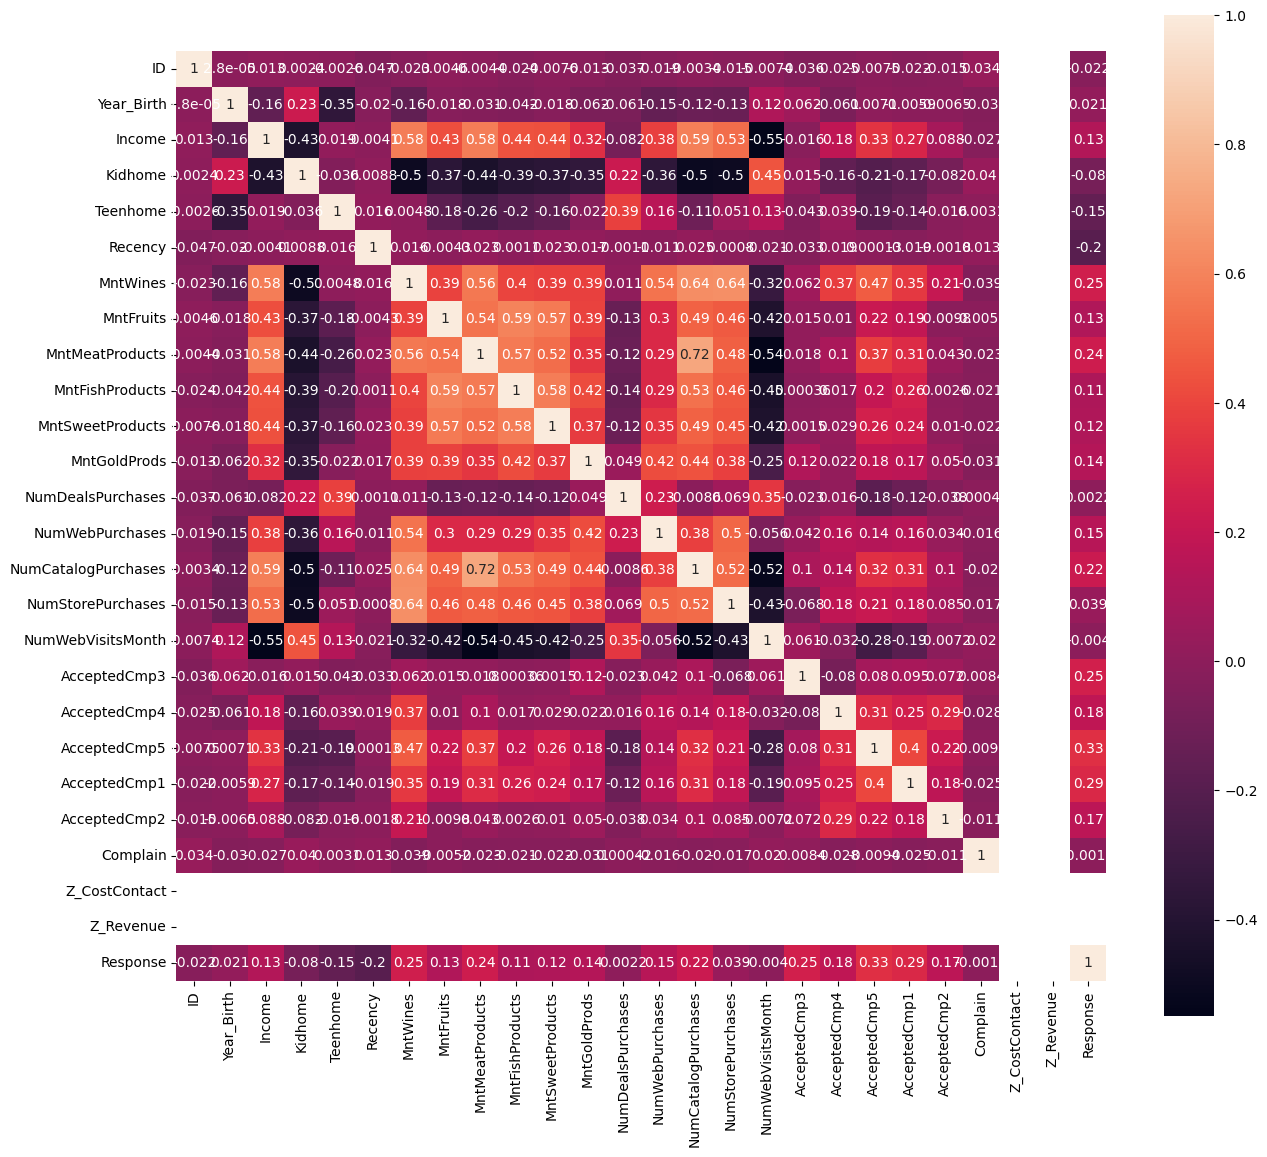

In [ ]:
#Correlation heatmap

ax = plt.subplots( figsize =( 15 , 13 ) )
foo = sns.heatmap(Clientele.corr(), vmax=1.0, square=True, annot=True)
plt.savefig('Clientele correlation heatmap.png')

##Part 2. Data Preprocessing and Feature Engineering

Dropping unnecessary columns for noise reduction

In [ ]:
#The columns 'Z_Revenue', 'ID' and 'Z_Cost_Contact' had to be droped because due to lacking practicality or significant meaning.

Clientele = Clientele.drop('Z_Revenue', axis=1)
Clientele = Clientele.drop('ID', axis=1)
Clientele = Clientele.drop('Z_CostContact', axis=1)

Compiling the campaign columns into one

In [ ]:
#Campaign columns were basically customers response to campaign (advertising), presented in binary values (0,1) = (yes,no).
#Combining them into one column 'Bought' makes handling convenient because they indicate one thing, which is the customers' response


Clientele['Bought'] = np.where((Clientele['AcceptedCmp1'] + Clientele['AcceptedCmp2'] + Clientele['AcceptedCmp3'] + Clientele['AcceptedCmp4'] + Clientele['AcceptedCmp5'] + Clientele['Response']) > 0, 1, 0)
Clientele = Clientele.drop('AcceptedCmp2', axis=1)
Clientele = Clientele.drop('AcceptedCmp3', axis=1)
Clientele = Clientele.drop('AcceptedCmp4', axis=1)
Clientele = Clientele.drop('AcceptedCmp5', axis=1)
Clientele = Clientele.drop('Response', axis=1)


In [ ]:
Clientele['Bought']

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    1
Name: Bought, Length: 2240, dtype: int64

In [ ]:
#Transforming 'Income' column values to become functional integers due to plotting troubles as float values

Clientele['Income'] = Clientele['Income'].astype(int)


In [ ]:
#Checking for effect
display(Clientele.dtypes)

Year_Birth              int64
Education              object
Marital_Status         object
Income                  int64
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp1            int64
Complain                int64
Bought                  int64
dtype: object

Feature engineering marital status by summarising the statuses into two easily comparable ones



In [ ]:
Clientele.loc[Clientele['Marital_Status'] == 'Single', 'Marital_Status'] = 'Single'
Clientele.loc[Clientele['Marital_Status'] == 'Divorced', 'Marital_Status'] = 'Single'
Clientele.loc[Clientele['Marital_Status'] == 'Widow', 'Marital_Status'] = 'Single'
Clientele.loc[Clientele['Marital_Status'] == 'Alone', 'Marital_Status'] = 'Single'
Clientele.loc[Clientele['Marital_Status'] == 'YOLO', 'Marital_Status'] = 'Single'
Clientele.loc[Clientele['Marital_Status'] == 'Absurd', 'Marital_Status'] = 'Single'
Clientele.loc[Clientele['Marital_Status'] == 'Married', 'Marital_Status'] = 'Relationship'
Clientele.loc[Clientele['Marital_Status'] == 'Together', 'Marital_Status'] = 'Relationship'

In [ ]:
#Checking the new column

Clientele['Marital_Status'].unique()

array(['Single', 'Relationship'], dtype=object)

In [ ]:
#Categorising the different levels of the clients into two , Tertiary and Non-tertiary education for easier assessment

Clientele.loc[Clientele['Education'] == 'PhD', 'Education'] = 'Tertiary Education'
Clientele.loc[Clientele['Education'] == 'Basic', 'Education'] = 'Non-tertiary Education'
Clientele.loc[Clientele['Education'] == 'Graduation', 'Education'] = 'Tertiary Education'
Clientele.loc[Clientele['Education'] == '2n Cycle', 'Education'] = 'Tertiary Education'
Clientele.loc[Clientele['Education'] == 'Master', 'Education'] = 'Tertiary Education'


In [ ]:
#Checking the new 'Education' column

Clientele['Education'].value_counts()


Tertiary Education        2186
Non-tertiary Education      54
Name: Education, dtype: int64




Correlation matrix showed that Kid and Teen homes had similar relationship scores when it came to different things eg: purchasing tendencies

Combining 'Kidhome' and 'Teenhome' columns to form one column; 'Children' for more convenient assessment






In [ ]:
#Merging kids and teens

Clientele['Children'] = np.where((Clientele['Kidhome'] + Clientele['Teenhome']) > 0, 1, 0)


In [ ]:
Clientele['Children'].value_counts()

1    1602
0     638
Name: Children, dtype: int64

Feature engineering Customers Age

In [ ]:
#Changing birth year to age

Clientele['Age'] = 2023 - Clientele['Year_Birth']
Clientele.drop('Year_Birth', axis=1, inplace=True)
Clientele = Clientele[Clientele['Age']<100]
Clientele['Age'].value_counts()


47    89
52    87
48    83
51    79
45    77
53    77
58    74
50    74
54    71
49    69
67    55
65    53
44    53
71    52
46    52
55    51
64    51
57    50
69    50
68    49
63    49
41    45
60    45
56    44
61    44
66    43
72    43
40    42
37    42
59    42
43    39
42    39
39    38
62    36
70    35
38    32
34    30
74    30
73    29
35    29
36    27
75    21
33    18
77    16
76    16
32    15
31    13
78     8
80     7
79     7
30     5
28     5
29     3
27     2
82     1
83     1
Name: Age, dtype: int64

In [ ]:
print(Clientele['Age'])

0       66
1       69
2       58
3       39
4       42
        ..
2235    56
2236    77
2237    42
2238    67
2239    69
Name: Age, Length: 2237, dtype: int64


In [ ]:
#Checking updated characteristics of data
Clientele.head(100)

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,Complain,Bought,Children,Age
0,Tertiary Education,Single,58138,0,0,4/9/2012,58,635,88,546,...,3,8,10,4,7,0,0,1,0,66
1,Tertiary Education,Single,46344,1,1,8/3/2014,38,11,1,6,...,2,1,1,2,5,0,0,0,1,69
2,Tertiary Education,Relationship,71613,0,0,21-08-2013,26,426,49,127,...,1,8,2,10,4,0,0,0,0,58
3,Tertiary Education,Relationship,26646,1,0,10/2/2014,26,11,4,20,...,2,2,0,4,6,0,0,0,1,39
4,Tertiary Education,Relationship,58293,1,0,19-01-2014,94,173,43,118,...,5,5,3,6,5,0,0,0,1,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Tertiary Education,Relationship,30096,1,0,22-05-2014,30,5,3,11,...,1,2,0,3,6,0,0,0,1,40
96,Tertiary Education,Single,47916,0,1,22-11-2012,72,505,0,26,...,5,7,4,6,6,0,0,1,1,63
97,Tertiary Education,Single,51813,1,1,11/4/2013,37,51,2,7,...,2,2,0,3,7,0,0,0,1,51
98,Tertiary Education,Relationship,78497,0,0,1/12/2013,44,207,26,447,...,1,5,7,12,2,1,0,1,0,72


##Part 3. Clientele Behavioural analysis and Graphical visualisations


<function matplotlib.pyplot.show(close=None, block=None)>

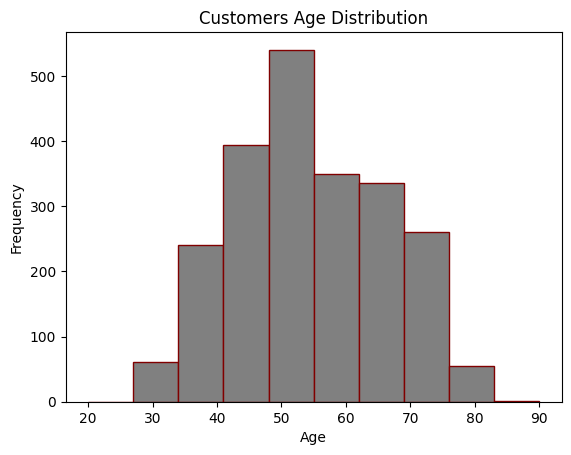

In [ ]:
#Age distribution of the customers

plt.hist(Clientele['Age'], bins=10, edgecolor='maroon', range = (20,90), color = 'grey')

plt.title('Customers Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show

In [ ]:
#Customer age ranges from late twenties to late eighties

#Most frequent customers were between the ages between 40 and 70

Customers Income distribution

In [ ]:
min_Income = Clientele['Income'].min()
print(min_Income)

max_Income = Clientele['Income'].max()
print(max_Income)

median_income = Clientele['Income'].median()
print(median_income)

average_income = Clientele['Income'].mean()
print(average_income)



1730
666666
51381.0
52227.4023245418


In [ ]:
#Customers income ranged between 1,730 - 666,666

#Median income of 51, 381 and average income of 52,227.4


Text(0.5, 0, 'Income')

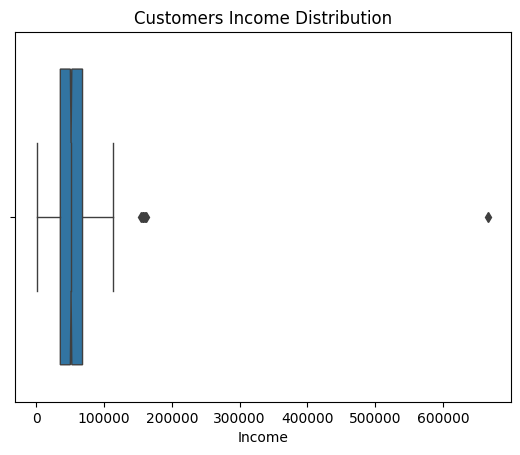

In [ ]:
#Visualisation: Boxplot of customer Income Ditribution

sns.boxplot(x = Clientele['Income'], linewidth = 1, width = 0.8, notch = 'true')

plt.title('Customers Income Distribution')
plt.xlabel('Income')

Seeeing relationship between Customers' Income vs the other variables and behaviour

Text(0, 0.5, 'Income')

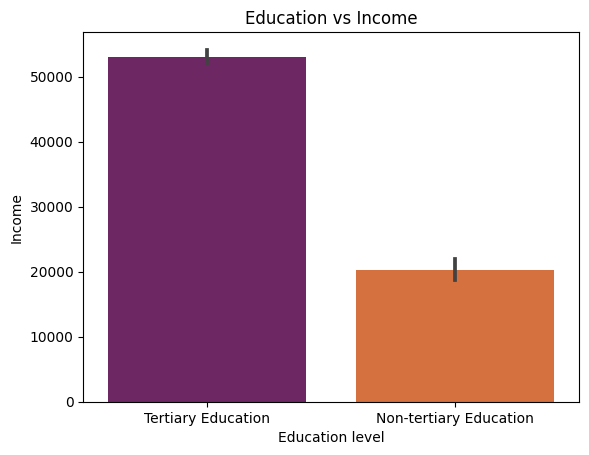

In [ ]:
#Income vs customer education levels

sns.barplot(x = 'Education', y = 'Income', palette = 'inferno', data = Clientele)

plt.title('Education vs Income')
plt.xlabel('Education level')
plt.ylabel('Income')

In [ ]:
#The more educated the customers were, the higher income they had.
#In this case, it is obvious that tertiary educated clients were significaanlt well off compared to those who had no tertiary education.

Text(0, 0.5, 'Income')

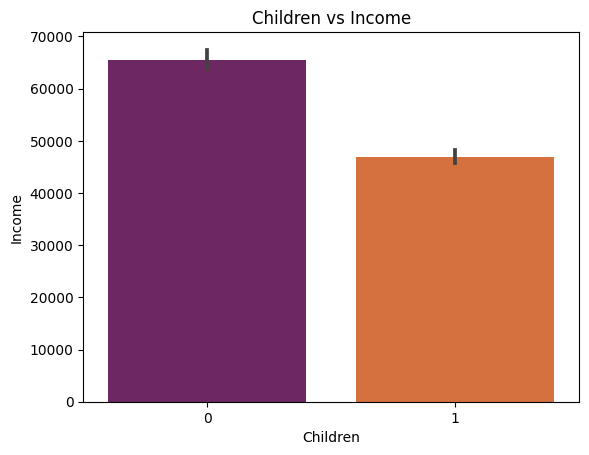

In [ ]:
#Income vs number of Children

sns.barplot(x = 'Children', y = 'Income', palette = 'inferno', data = Clientele)

plt.title('Children vs Income')
plt.xlabel('Children')
plt.ylabel('Income')



In [ ]:
#Higher Income clients seem to have more income.

#However, from the boxplot prior, average income was about 50,000, which both children and non-children homes have.

#The richer clients with income of almost 70,000 clients were "outliers"

Purchase channels vs Education

Text(0, 0.5, 'Web visits per month')

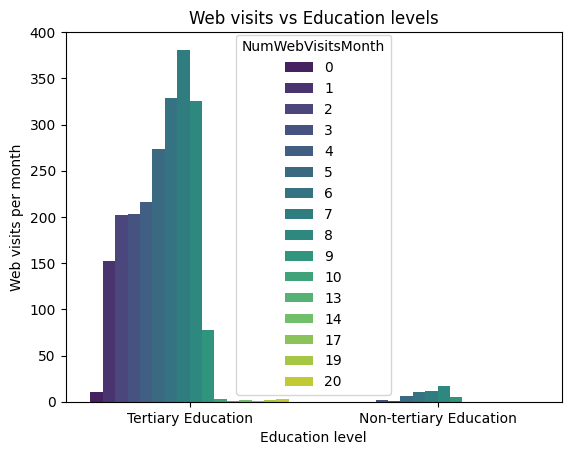

In [ ]:
#Web visits and education

sns.countplot(x='Education', hue='NumWebVisitsMonth', palette = 'viridis', data=Clientele)
plt.title('Web visits vs Education levels')
plt.xlabel('Education level')
plt.ylabel('Web visits per month')

Text(0, 0.5, 'Web purchases')

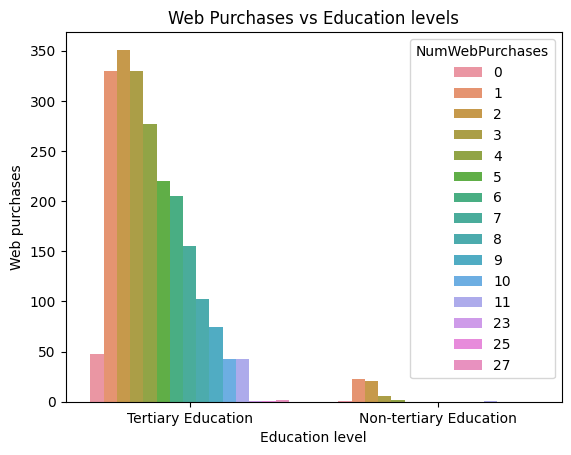

In [ ]:
#Web purchases and education

sns.countplot(x='Education', hue='NumWebPurchases', data=Clientele)

plt.title('Web Purchases vs Education levels')
plt.xlabel('Education level')
plt.ylabel('Web purchases')


In [ ]:
#The hypothesis was that tertiary educated clients were more likely to use web channels for browsing (web visits) and purchases.
#This is probably due to being more knowledgeable and most likely tech-savvy with better gadgets

#From observation, the hypothesis proved true.

Purchase channels vs Children

Text(0, 0.5, 'Web visits per month')

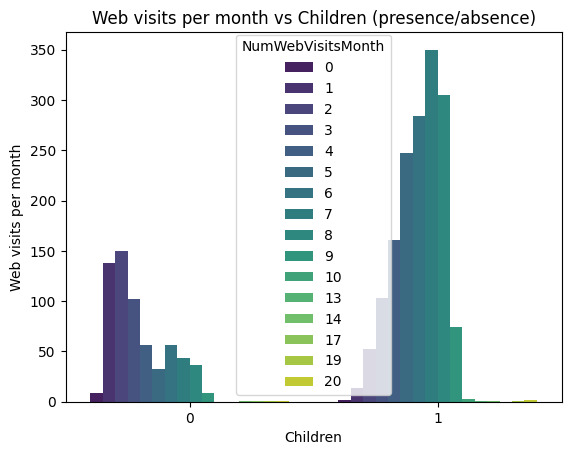

In [ ]:
#Web visits per month vs Children

sns.countplot(x='Children', hue='NumWebVisitsMonth', palette = 'viridis', data=Clientele)

plt.title('Web visits per month vs Children (presence/absence)')
plt.xlabel('Children')
plt.ylabel('Web visits per month')

Text(0, 0.5, 'Count of web purchases')

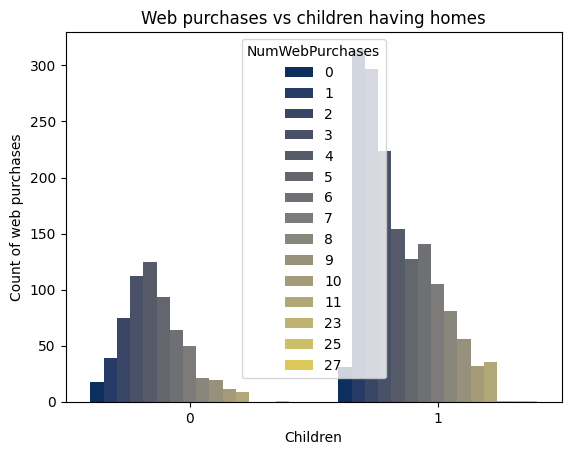

In [ ]:
#Web purchases vs children

sns.countplot(x='Children', hue='NumWebPurchases', palette = 'cividis', data=Clientele)

plt.title('Web purchases vs children having homes')
plt.xlabel('Children')
plt.ylabel('Count of web purchases')

In [ ]:
#The theory was that parents in homes with young children and teens most likely needed to browse and shop online a lot.
#This is because they have to care for their kids at home or shop with them online for convenience and ease.

<Axes: xlabel='Children', ylabel='count'>

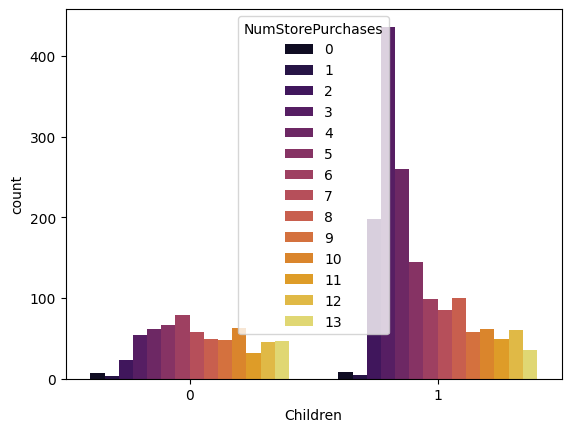

In [ ]:
#Store purchases vs children

sns.countplot(x='Children', hue='NumStorePurchases', palette = 'inferno', data=Clientele)

In [ ]:
#Children-having-homes also had more store purchases than those without children.

#However, most values values were the same with non-children homes.


Text(0, 0.5, 'Count of catalog purchases')

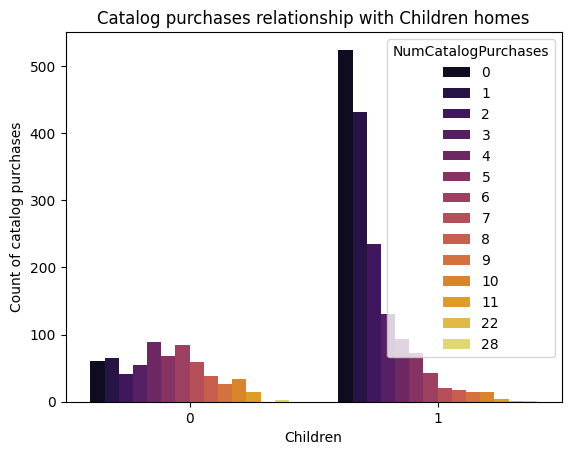

In [ ]:
#Catalog purchases vs Children

sns.countplot(x='Children', hue='NumCatalogPurchases', palette = 'inferno', data=Clientele)

plt.title('Catalog purchases relationship with Children homes')
plt.xlabel('Children')
plt.ylabel('Count of catalog purchases')

In [ ]:
#Catalog purchases were significantly higher in children homes.

#Catalog purchasers usually want very specific items that can be ordered or shipped to them.
#Therefore, it is no surprise that chldren homes not only have high web purchases, but also high catalog purchases.

Type of products vs children

<Axes: xlabel='Children', ylabel='MntWines'>

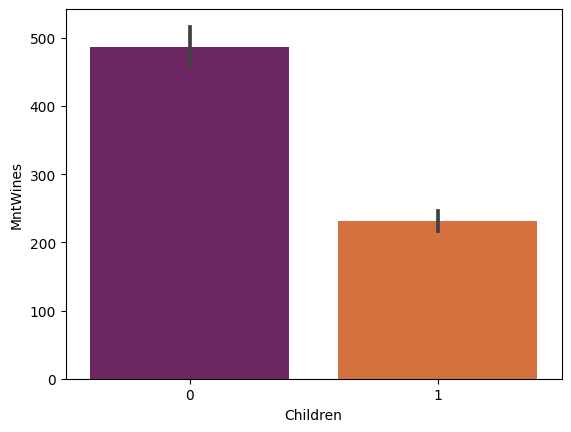

In [ ]:
#Wine(alcohol) vs Children

sns.barplot(x = 'Children', y = 'MntWines', palette = 'inferno', data = Clientele)


In [ ]:
#Homes without children had the most alcohol purchases.
#This is probably due to children homes wanting safer, alcohol free environment for their kids among other reasons.

<Axes: xlabel='Children', ylabel='MntSweetProducts'>

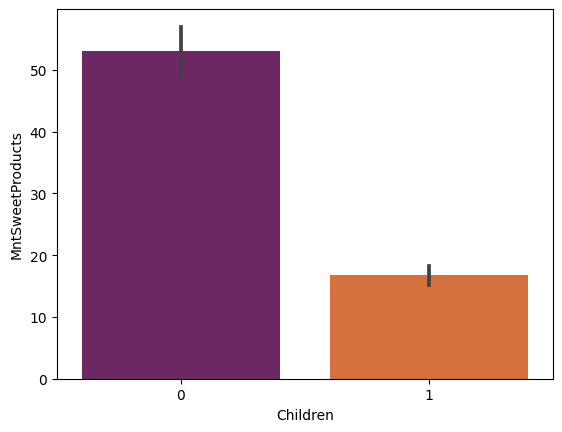

In [ ]:
#Sweet products vs Children

sns.barplot(x = 'Children', y = 'MntSweetProducts', palette = 'inferno', data = Clientele)

#feels absurb but correlation matrix backs it up


In [ ]:
#The hypothesis was that homes with children would buy more sweets, however that is NOT the case.

#This may be due to parents wanting to protect their children's oral and overall body health

Purchase channel vs marital status

<Axes: xlabel='Marital_Status', ylabel='count'>

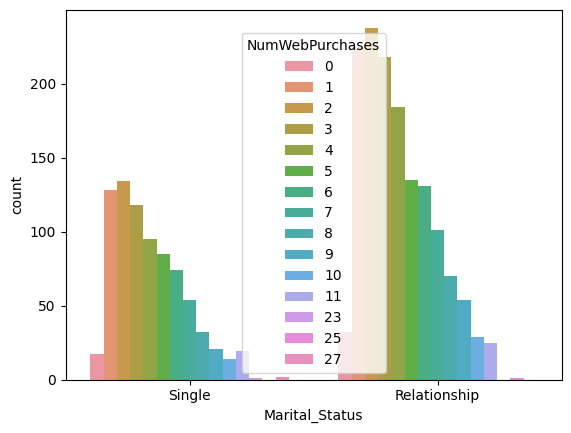

In [ ]:
#Marital status vs web purchases

sns.countplot(x='Marital_Status', hue='NumWebPurchases', data=Clientele)

<Axes: xlabel='Marital_Status', ylabel='count'>

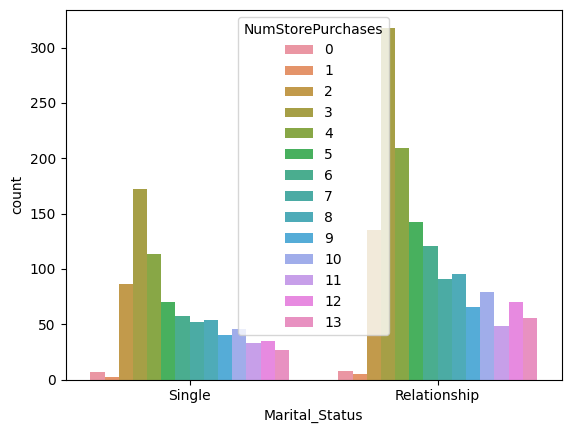

In [ ]:
#Marital status vs store purchases

sns.countplot(x='Marital_Status', hue='NumStorePurchases', data=Clientele)


<Axes: xlabel='Marital_Status', ylabel='count'>

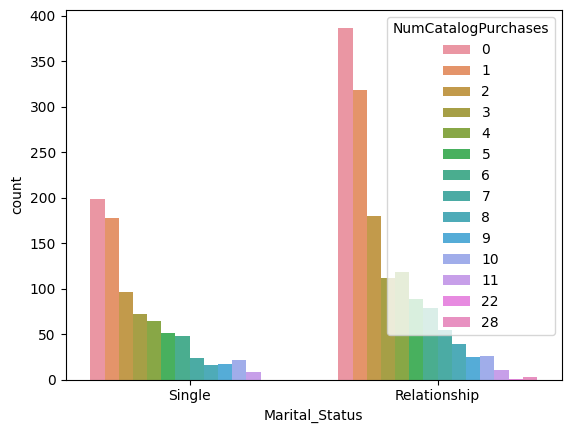

In [ ]:
#Marital status vs catalog purchases


sns.countplot(x='Marital_Status', hue='NumCatalogPurchases', data=Clientele)

In [ ]:
#Higher values in both store and web purchases for customers in a relationship.

#A slight drop in store purchases for single customers

#Customers in a relationship who were probably married had very high values for catalog purchases.
#Two factors could be constributing to this; being in a relationship and wanting to spend time with loved one at home AND shopping for specific items especially for children.

Scatter plots


1.   Gold products - vanity
2.   Expensive food (fish) - important food groups but can be pricey
3.   Deals utilisation - who used more discounts?




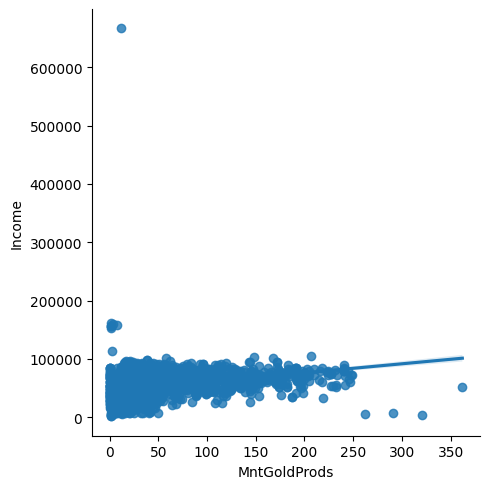

In [ ]:
sns.lmplot(x='MntGoldProds',y='Income',data = Clientele, fit_reg = True)

In [ ]:
#Richer customers rarly bought gold products while those with lower income bought more gold products.

#The richer customers most likely pefered to visit expensive jewellers instead of buying jewelry from a convenience store.

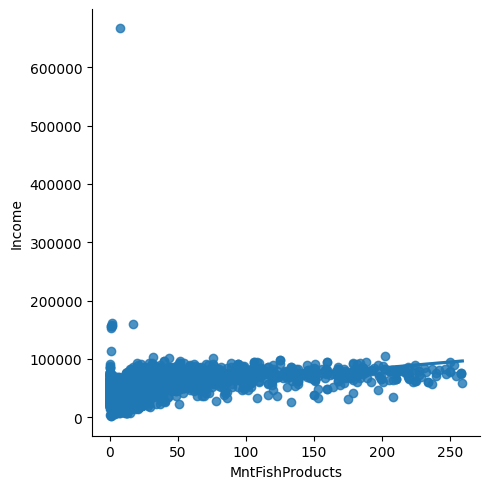

In [ ]:
sns.lmplot(x='MntFishProducts',y='Income',data = Clientele, fit_reg = True)

In [ ]:
#From the correlation matrix, fish and meat products seemed to be more popular and most likely more accessible to richer clients.

#The graphs above shows that most fish products were bought by richer clients

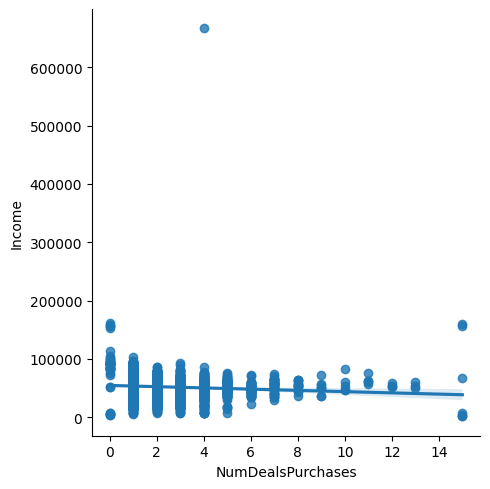

In [ ]:
sns.lmplot(x='NumDealsPurchases',y='Income',data = Clientele, fit_reg = True)

In [ ]:
#All customers enjoyed the deals which are discount

#More deals purchases were made by lower income customers

End of other relationships

##Part 4. Supervised Learning

###Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder

Label encoding Education and Marital status

In [ ]:
#Education

label_encoder = LabelEncoder()
Clientele['Education'] = label_encoder.fit_transform(Clientele['Education'])

encoded_labels = label_encoder.classes_
for label, encoded_value in enumerate(encoded_labels):
    print(f"The numerical value {label} corresponds to: {encoded_value}")

The numerical value 0 corresponds to: Non-tertiary Education
The numerical value 1 corresponds to: Tertiary Education


In [ ]:
#Marital_Status
label_encoder = LabelEncoder()
Clientele['Marital_Status'] =label_encoder.fit_transform(Clientele['Marital_Status'])

encoded_labels = label_encoder.classes_
for label, encoded_value in enumerate(encoded_labels):
    print(f"The numerical value {label} corresponds to: {encoded_value}")

The numerical value 0 corresponds to: Relationship
The numerical value 1 corresponds to: Single


Creating X and y variables, defining features

In [ ]:
cols = ['Dt_Customer', 'Bought']
X = Clientele.drop(cols, axis=1)
print(X.head(2))

   Education  Marital_Status  Income  Kidhome  Teenhome  Recency  MntWines  \
0          1               1   58138        0         0       58       635   
1          1               1   46344        1         1       38        11   

   MntFruits  MntMeatProducts  MntFishProducts  ...  MntGoldProds  \
0         88              546              172  ...            88   
1          1                6                2  ...             6   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   

   NumWebVisitsMonth  AcceptedCmp1  Complain  Children  Age  
0                  7             0         0         0   66  
1                  5             0         0         1   69  

[2 rows x 21 columns]


In [ ]:
X

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,Complain,Children,Age
0,1,1,58138,0,0,58,635,88,546,172,...,88,3,8,10,4,7,0,0,0,66
1,1,1,46344,1,1,38,11,1,6,2,...,6,2,1,1,2,5,0,0,1,69
2,1,0,71613,0,0,26,426,49,127,111,...,42,1,8,2,10,4,0,0,0,58
3,1,0,26646,1,0,26,11,4,20,10,...,5,2,2,0,4,6,0,0,1,39
4,1,0,58293,1,0,94,173,43,118,46,...,15,5,5,3,6,5,0,0,1,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1,0,61223,0,1,46,709,43,182,42,...,247,2,9,3,4,5,0,0,1,56
2236,1,0,64014,2,1,56,406,0,30,0,...,8,7,8,2,5,7,1,0,1,77
2237,1,1,56981,0,0,91,908,48,217,32,...,24,1,2,3,13,6,0,0,0,42
2238,1,0,69245,0,1,8,428,30,214,80,...,61,2,6,5,10,3,0,0,1,67


In [ ]:
y = Clientele['Bought']
y

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    1
Name: Bought, Length: 2237, dtype: int64

Splitting the data into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

#print("Total sample size = %i; \nfeature training sample size = %i, \ntarget training sample size = %i, \nfeature testing sample size = %i, \ntarget testing sample size= %i"\
     #%(data.shape[0], X_train.shape[0],y_train.shape[0],X_test.shape[0], y_test.shape[0]))

KNN

              precision    recall  f1-score   support

           0       0.80      0.94      0.87       318
           1       0.76      0.43      0.55       130

    accuracy                           0.79       448
   macro avg       0.78      0.69      0.71       448
weighted avg       0.79      0.79      0.77       448



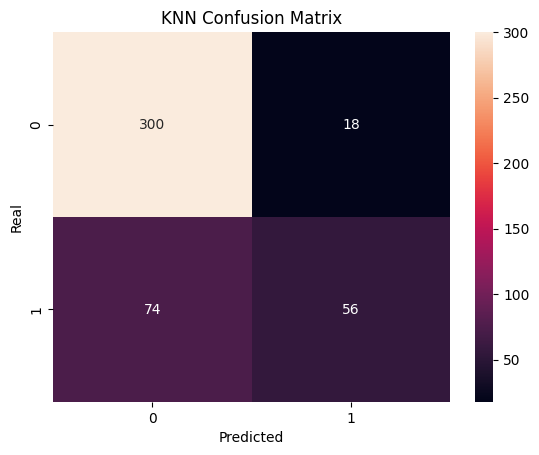

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
knn_model = knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.savefig('KNN Confusion matrix')




Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.87      0.72      0.79       318
           1       0.52      0.73      0.61       130

    accuracy                           0.72       448
   macro avg       0.69      0.73      0.70       448
weighted avg       0.77      0.72      0.73       448



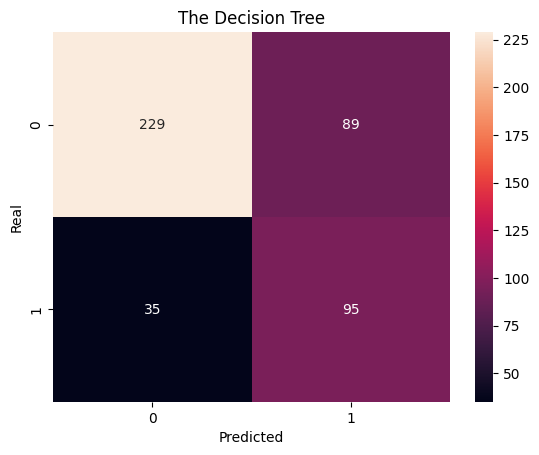

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, class_weight='balanced', min_weight_fraction_leaf=0.01)
dt_model = dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('The Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.savefig('Decision Tree - Confusion Matrix ')

Logistic Regression model

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.80      0.93      0.86       318
           1       0.71      0.42      0.53       130

    accuracy                           0.78       448
   macro avg       0.75      0.68      0.69       448
weighted avg       0.77      0.78      0.76       448



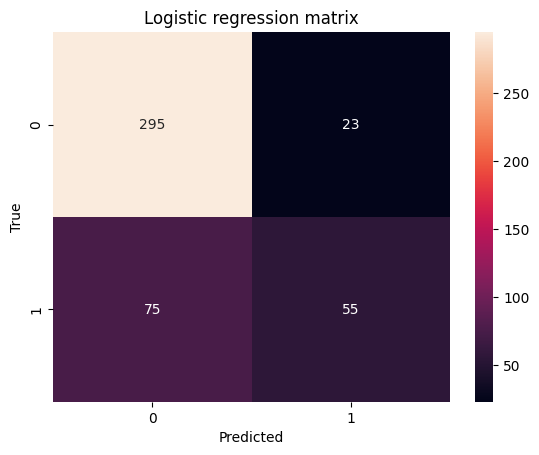

In [ ]:
lgr = LogisticRegression()
lgr_model = lgr.fit(X_train, y_train)

y_pred = lgr.predict(X_test)
print(classification_report(y_test, y_pred))
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Logistic regression matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('Confusion Matrix - Logistic Regression')

##Part4.1: Ensemble method: Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       318
           1       0.71      0.42      0.53       130

    accuracy                           0.78       448
   macro avg       0.75      0.68      0.69       448
weighted avg       0.77      0.78      0.76       448



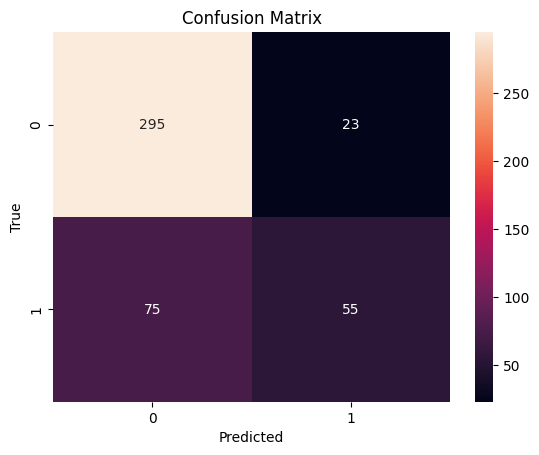

In [ ]:
bagging = BaggingClassifier(
    KNeighborsClassifier(
        n_neighbors=2,
        weights='distance'
        ),
    oob_score=True,
    max_samples=0.5,
    max_features=1.0
    )
bag_model = bagging.fit(X_train, y_train)

y_pred = lgr.predict(X_test)
print(classification_report(y_test, y_pred))

matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('Confusion Matrix - KNN Bagging Ensemble')


In [ ]:
#The bagging ensemble method performance was pretty impressive with an accuracy score of 77.2%

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       318
           1       0.67      0.79      0.73       130

    accuracy                           0.83       448
   macro avg       0.79      0.82      0.80       448
weighted avg       0.84      0.83      0.83       448



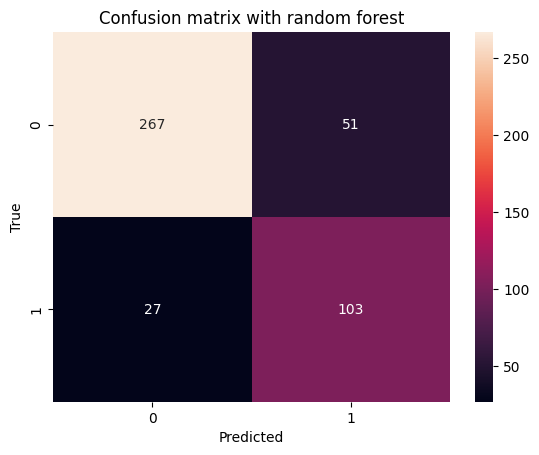

In [ ]:
rf = RandomForestClassifier(
    n_estimators=1000,
    max_depth=None,
    min_samples_split=10,
    class_weight="balanced",
    min_weight_fraction_leaf=0.02
    )
rf_model = rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt='d')
plt.title('Confusion matrix with random forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('Confusion Matrix - Random Forest')

Gradient boosting

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       318
           1       0.78      0.68      0.72       130

    accuracy                           0.85       448
   macro avg       0.83      0.80      0.81       448
weighted avg       0.85      0.85      0.85       448



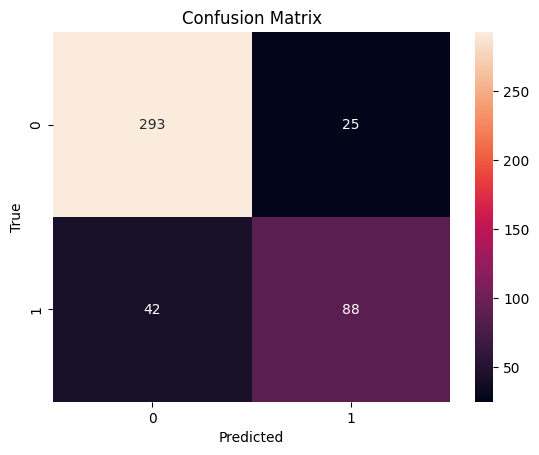

In [ ]:
gb = GradientBoostingClassifier(
            loss='exponential',
            n_estimators=1000,
            learning_rate=0.1,
            max_depth=3,
            subsample=0.5,
            random_state=0
            )
gb_model = gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)
print(classification_report(y_test, y_pred))

matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('Gradient boosting Confusion matrix')

Extreme Gradient boost

In [ ]:
import xgboost as xgb


In [ ]:
from xgboost import XGBClassifier

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       318
           1       0.79      0.65      0.71       130

    accuracy                           0.85       448
   macro avg       0.83      0.79      0.81       448
weighted avg       0.84      0.85      0.84       448



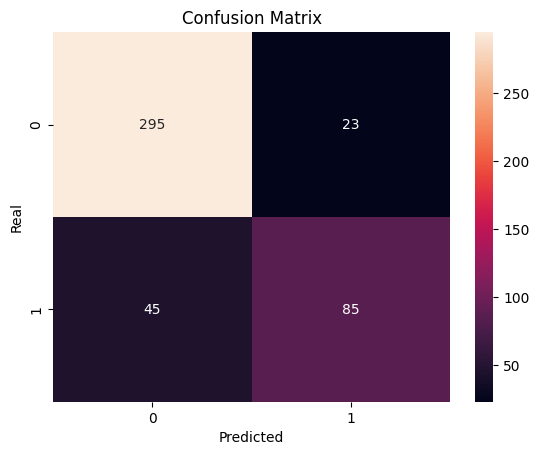

In [ ]:
# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X, label=y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }

# instantiate the classifier
xgb = XGBClassifier(**params)


# fit the classifier to the training data
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))

matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.savefig('Extreme Gradient Boost matrix')

XGB Boost Feature Importance

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

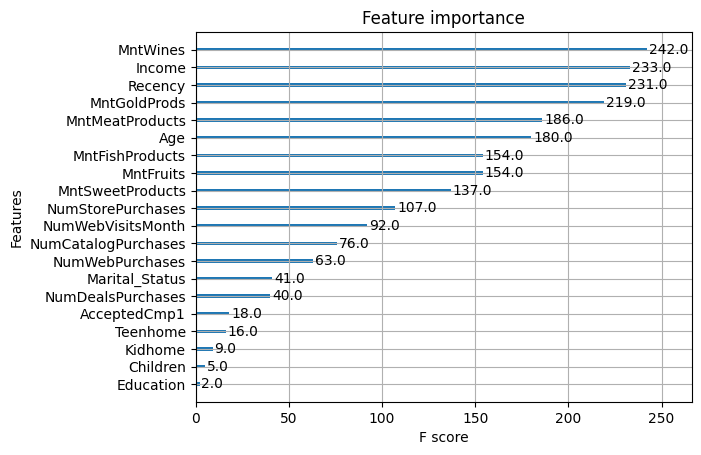

<Figure size 1600x1200 with 0 Axes>

In [ ]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)

xgb.plot_importance(xgb_clf)
plt.figure(figsize = (16, 12))
plt.show()

In [ ]:
#The model ranks the variables as most important features to pay attention to.
#Wines, Income, Recency, Meat products and age ranked top 5

In [ ]:
from xgboost import XGBClassifier


In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

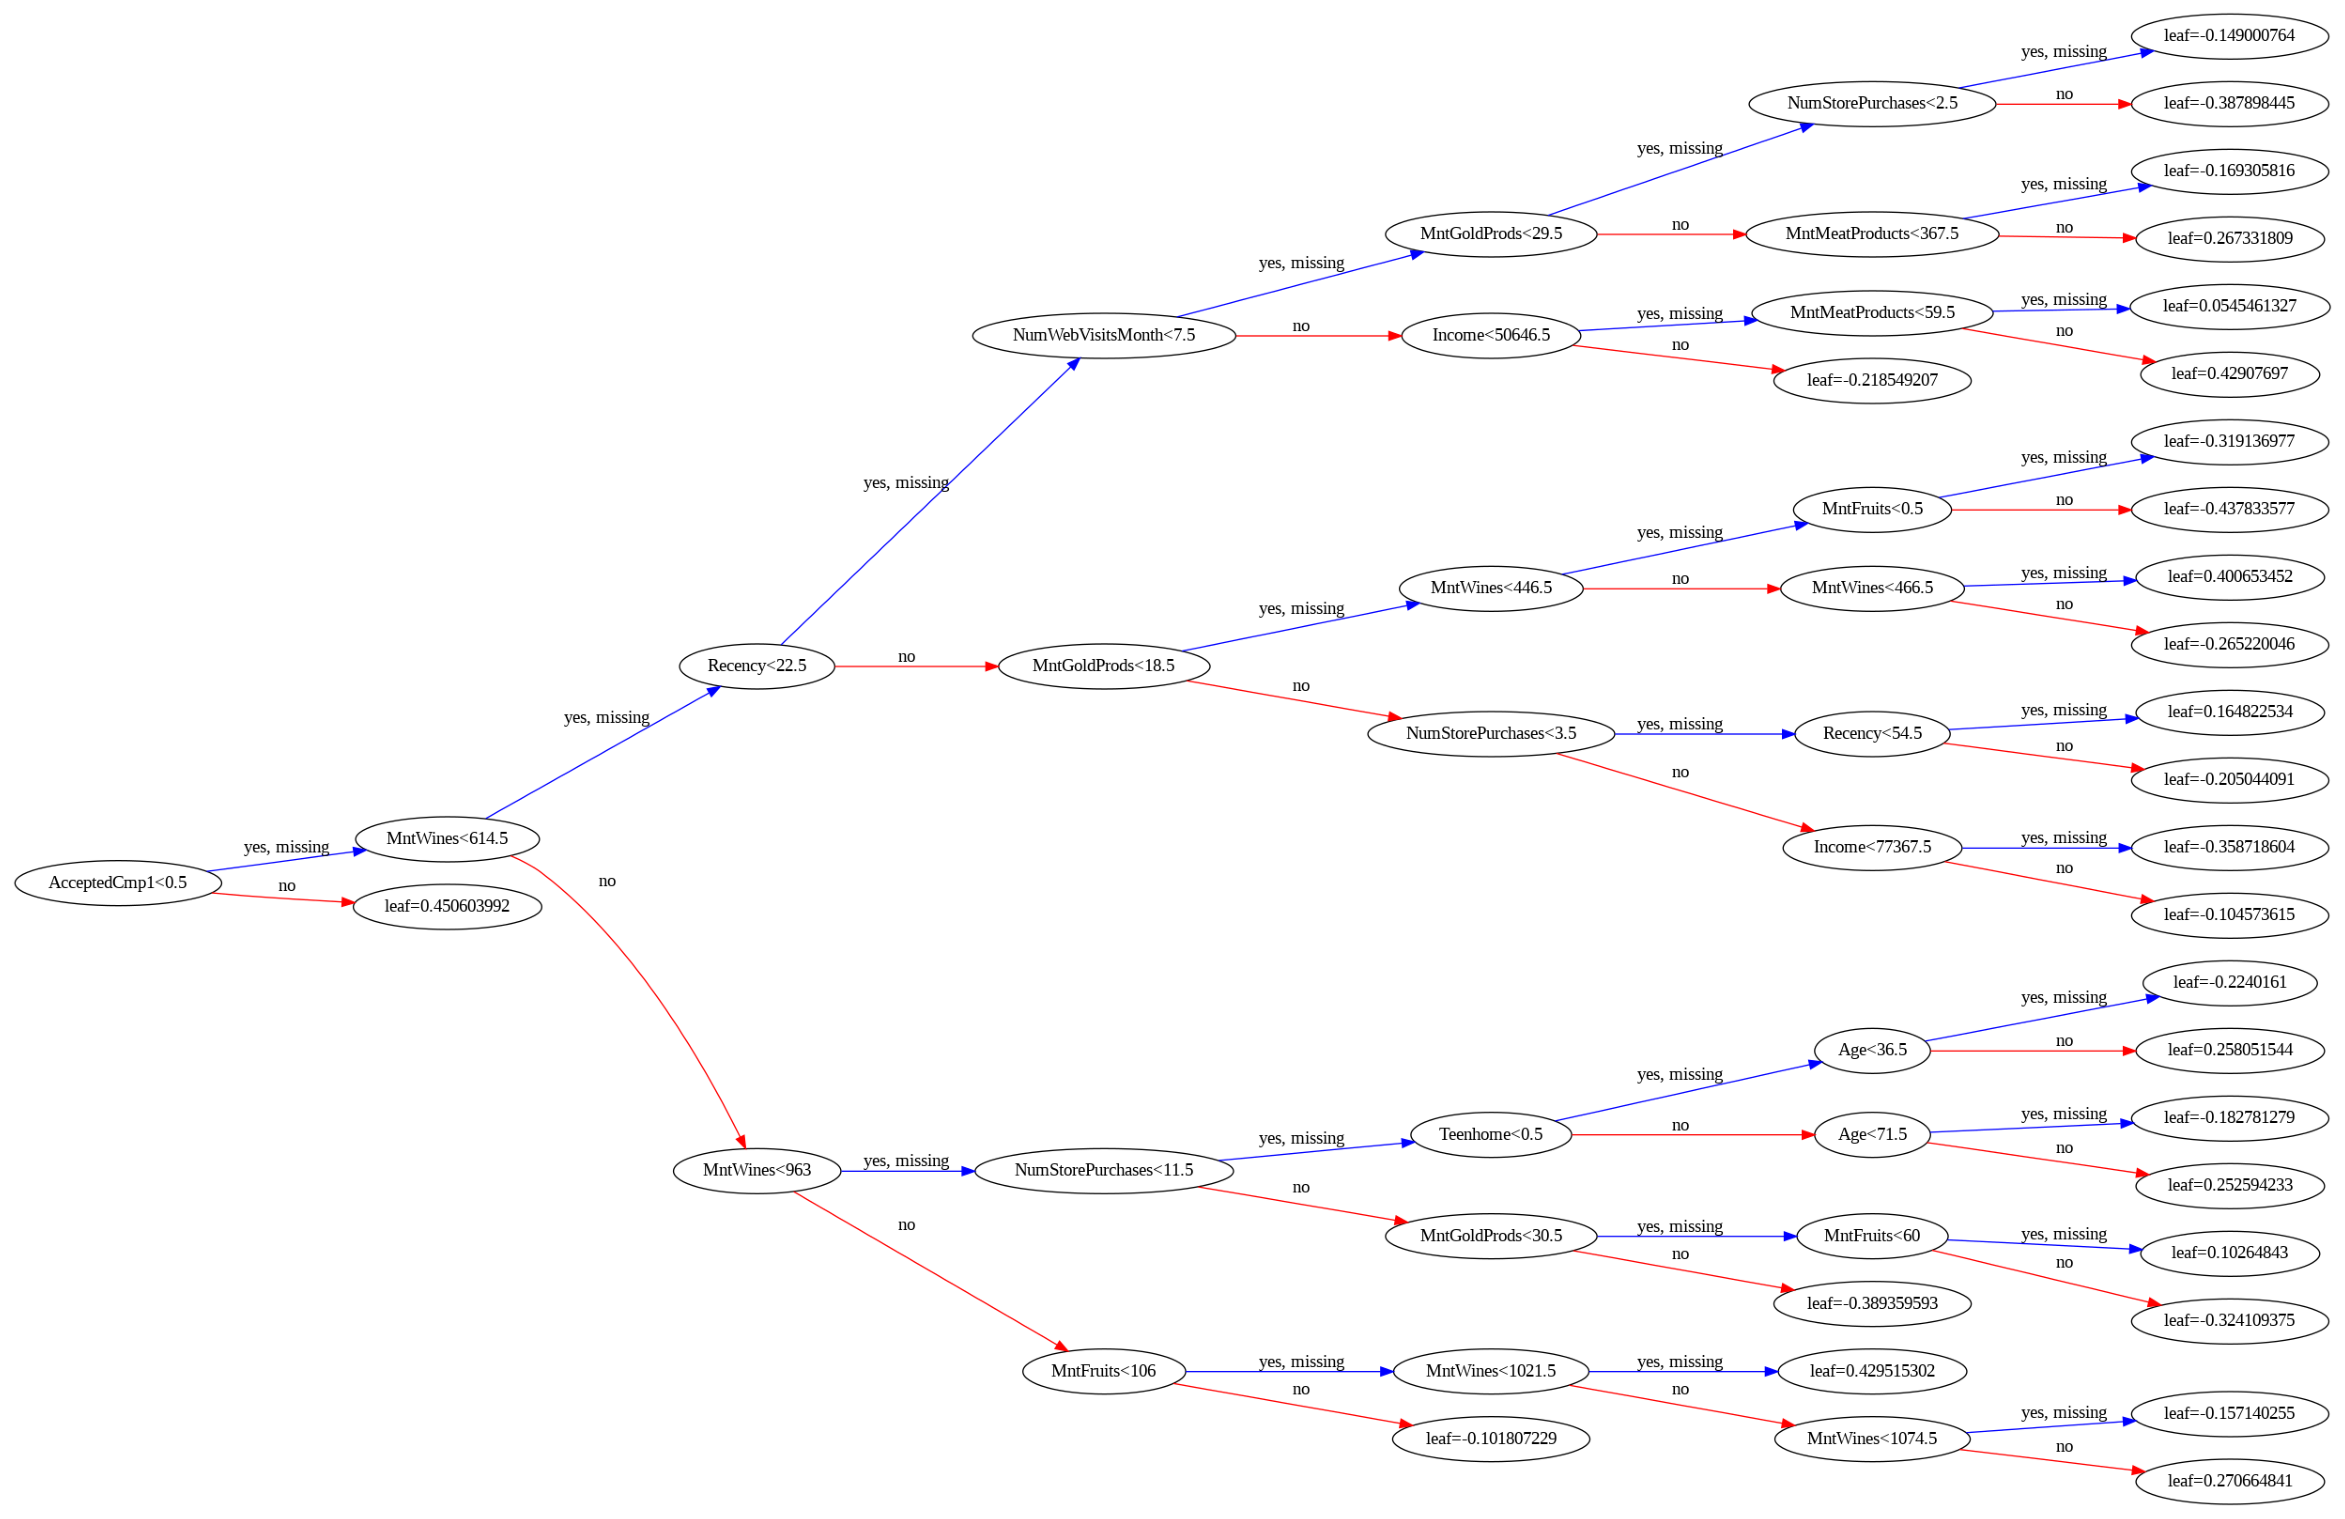

In [ ]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(30, 30))

from xgboost import plot_tree

plot_tree(xgb_clf,num_trees=1,rankdir="LR",ax=ax)

plt.show()

Summary of the models performance

In [ ]:
# Performance for multiple classification algorithms

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
# making a loop for multiple classifications
models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    BaggingClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    KNeighborsClassifier()
]

for model in models:
    scores = cross_val_score(model, X, y, cv=5)
    print(f"Model: {type(model).__name__}")
    print(f"Mean Score: {scores.mean():.2f}\n")

Model: DecisionTreeClassifier
Mean Score: 0.78

Model: RandomForestClassifier
Mean Score: 0.84

Model: BaggingClassifier
Mean Score: 0.83

Model: GradientBoostingClassifier
Mean Score: 0.84

Model: XGBClassifier
Mean Score: 0.84

Model: KNeighborsClassifier
Mean Score: 0.76



In [ ]:
from sklearn.metrics import f1_score, make_scorer

scorer = make_scorer(f1_score, greater_is_better=True,
                     average = 'macro')

In [ ]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(xgb_clf, X_train, y_train, cv = 10,
                           scoring = scorer)

In [ ]:
print(f' 10 Fold Cross Validation\n F1 Score = {round(cv_score.mean(), 4)}\n std = {round(cv_score.std(), 4)}')

 10 Fold Cross Validation
 F1 Score = 0.7667
 std = 0.0209


##Part5: Unsupervised Learning: Kmeans Clustering

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [ ]:
# Select relevant columns for PCA and clustering
selected_columns = ['Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Children', 'Age', 'Bought']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Clientele[selected_columns])

# Apply PCA for dimensionality reduction
pca = PCA(n_components=10)
reduced_data = pca.fit_transform(scaled_data)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_data)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to the DataFrame
Clientele['Cluster'] = cluster_labels

# Display the cluster assignments
print(Clientele['Cluster'].value_counts())

# Compute evaluation metrics
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
dbi = davies_bouldin_score(scaled_data, cluster_labels)
chi = calinski_harabasz_score(scaled_data, cluster_labels)

# Print the evaluation metrics
print("Silhouette Coefficient:", silhouette_avg)
print("Davies-Bouldin Index:", dbi)
print("Calinski-Harabasz Index:", chi)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4    561
0    551
3    542
2    529
1     54
Name: Cluster, dtype: int64
Silhouette Coefficient: 0.11499784737732874
Davies-Bouldin Index: 1.9918896796436436
Calinski-Harabasz Index: 370.2707480077381
